In [13]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# important paths and file names

BIKE_DATA_PATH = "/media/mircea/CEF1-30A0/data/"
MAIN_DATA_FILE_NAME = "_speed_acc.txt"

TRIP_SAVE_LOCATION = "/home/mircea/.bike-sys/"
CSV_HEAD_DATA_FILE = "velocity, delta V\n" 

DEFAULT_TRIP_NAME = "trip.txt"

In [37]:
# run to split the collected data into trips
#   (data is stored in equally sized chunks)
MIN_LINES_IN_FILE = 12 # more or less 50 meters (don't count trips shorter than this)

allFiles = os.listdir(BIKE_DATA_PATH)
dataFiles = [file for file in allFiles if MAIN_DATA_FILE_NAME in file]
dataFiles.sort()
print(dataFiles)

numberOfSavedTrips = 0

def findNumberOfSavedTrips():
    tripFiles = os.listdir(TRIP_SAVE_LOCATION)
    return len(tripFiles)

tripIdx = findNumberOfSavedTrips() - 1 # i do  ++ every time i find the csv header
currentTripName = str(tripIdx) + "_" + DEFAULT_TRIP_NAME

linesInFile = 0

for dataFileName in dataFiles:
    with open(BIKE_DATA_PATH + dataFileName, 'r') as dataFile:
        for line in dataFile:
            if line == CSV_HEAD_DATA_FILE:
                tripIdx += 1
                currentTripName = str(tripIdx) + "_" + DEFAULT_TRIP_NAME
            with open(TRIP_SAVE_LOCATION + currentTripName, 'a') as newTripFile:
                    newTripFile.write(line)

for dataFileName in dataFiles:
    os.remove(BIKE_DATA_PATH + dataFileName)


[]


In [65]:
# useful constants

# conversions
MM_TO_KM = 1000000
MM_TO_M = 1000
KMPH_TO_MPS = 1000 / 3600
BIKE_WHEEL_DIAMETER_MM = 700
BIKE_WHEEL_PERIMETER_MM = BIKE_WHEEL_DIAMETER_MM * 2 * np.pi


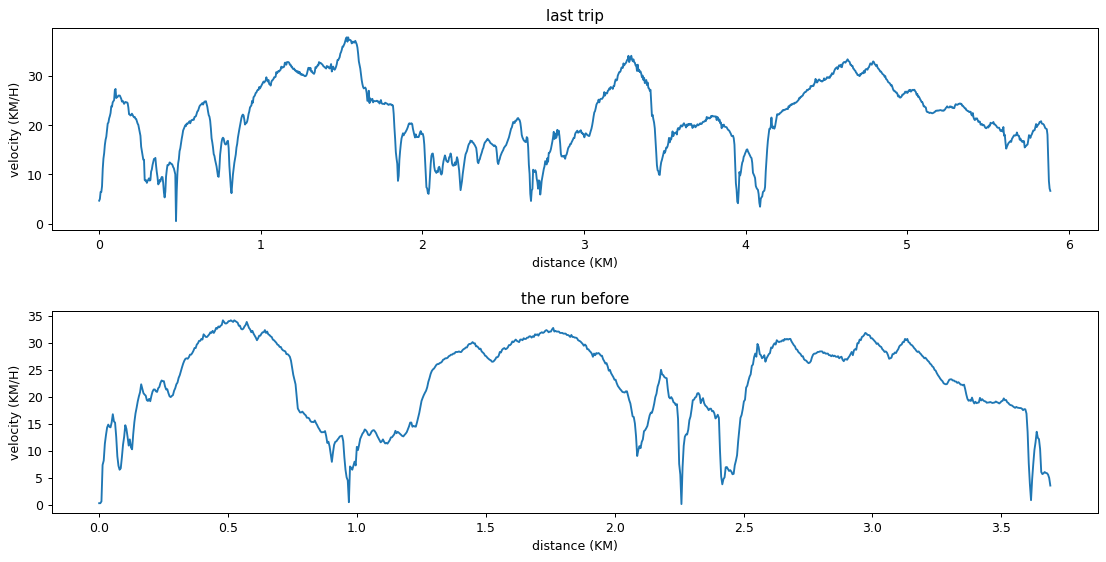

In [69]:
# run this to plot:
#   * the latest trip speed evolution
#   * the last 2 trips overlapped (to the destination and on the way back)
#   * past 10 trips overlapped (maybe spot a trend)

FIGURE_COLS = 1
FIGURE_ROWS = 2

PAST_TRIPS_TO_SHOW = 5

TRIP_TO_SHOW = 2

tripFiles = os.listdir(TRIP_SAVE_LOCATION)
tripFiles.sort(reverse=True)

figure(figsize=(15, 7), dpi=90)

# big plot of the past two trips followed by small plots of 5 previous trips 
tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFiles[0])
distanceList = np.linspace(0, len(tripCsv["velocity"]), len(tripCsv["velocity"]))
distanceList = [distMarker * (BIKE_WHEEL_PERIMETER_MM / MM_TO_KM) for distMarker in distanceList]

plt.subplot(FIGURE_ROWS, FIGURE_COLS, 1)
plt.plot(distanceList, tripCsv["velocity"])
plt.xlabel("distance (KM)")
plt.ylabel("velocity (KM/H)")
plt.title("last trip")


tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFiles[1])
distanceList = np.linspace(0, len(tripCsv["velocity"]), len(tripCsv["velocity"]))
distanceList = [distMarker * (BIKE_WHEEL_PERIMETER_MM / MM_TO_KM) for distMarker in distanceList]

plt.subplot(FIGURE_ROWS, FIGURE_COLS, 2)
plt.plot(distanceList, tripCsv["velocity"])
plt.xlabel("distance (KM)")
plt.ylabel("velocity (KM/H)")
plt.title("the run before")

plt.subplots_adjust(hspace=0.4)
plt.show()


In [143]:
# show stats on all trips

tripFiles = os.listdir(TRIP_SAVE_LOCATION)
tripFiles.sort(reverse=True)

maxSpeed = 0
averageSpeed = 0

longestTripLength = 0
totalDistance = 0
averageTripDistance = 0

tripFiles = os.listdir(TRIP_SAVE_LOCATION)

for tripFileName in tripFiles:
    tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFileName)
    velocityList = tripCsv['velocity']
    
    tripLength = len(velocityList)
    totalDistance += tripLength
    tripMaxSpeed = max(velocityList)
    tripAverageSpeed = sum(velocityList)/len(velocityList)
    averageSpeed += tripAverageSpeed

    if tripMaxSpeed > maxSpeed:
        maxSpeed = tripMaxSpeed
    if tripLength > longestTripLength:
        longestTripLength = tripLength

averageSpeed /= len(tripFiles)
longestTripLength = longestTripLength * BIKE_WHEEL_PERIMETER_MM / MM_TO_KM
totalDistance = totalDistance * BIKE_WHEEL_PERIMETER_MM / MM_TO_KM
averageTripDistance = totalDistance / len(tripFiles)

print("fastest speed:\t" + str(maxSpeed) + " KM/H")
print("average speed:\t" + str(round(averageSpeed, 2)) + " KM/H")
print()
print("longest trip:\t" + str(round(longestTripLength, 2)) + " KM")
print("total distance:\t" + str(round(totalDistance, 2)) + " KM")
print("avg distance:\t" + str(round(averageTripDistance, 2)) + " KM")

fastest speed:	37.88 KM/H
average speed:	21.43 KM/H

longest trip:	5.88 KM
total distance:	13.22 KM
avg distance:	4.41 KM


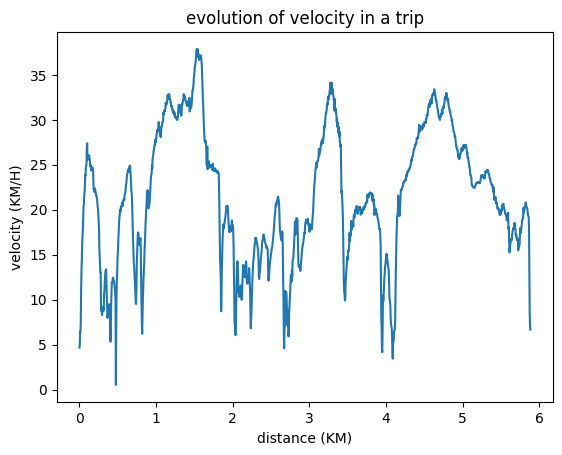

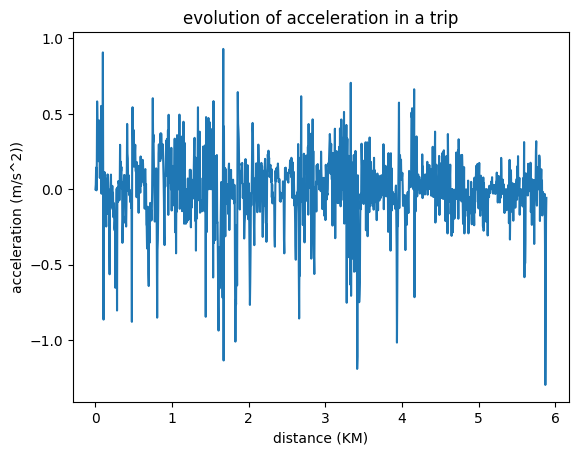

0.00013515732872162065


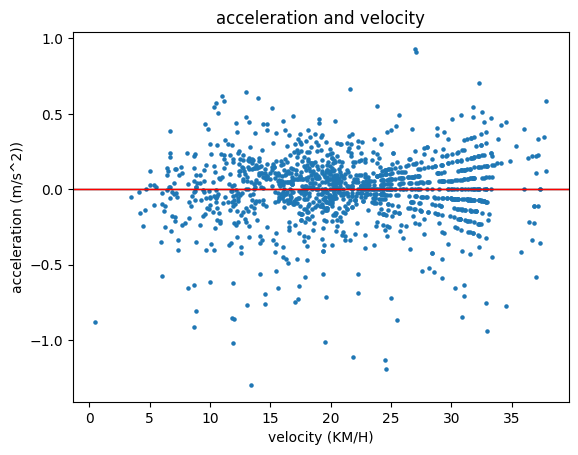

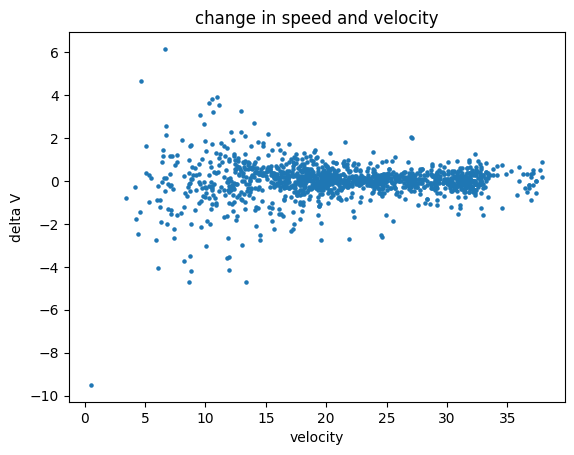

In [137]:
# run this to plot:
#   interesting things about the latest trip
TRIP_TO_SHOW = 0

tripFiles = os.listdir(TRIP_SAVE_LOCATION)
tripFiles.sort(reverse=True)

tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFiles[TRIP_TO_SHOW])
accList = tripCsv[" delta V"]
accList = [accVal * KMPH_TO_MPS/(2 * BIKE_WHEEL_PERIMETER_MM / MM_TO_M) for accVal in accList]

for idx in range(0, len(accList)):
    if(idx != 0):
        accList[idx] *= (tripCsv["velocity"][idx] + tripCsv["velocity"][idx - 1]) * KMPH_TO_MPS
    else:
        accList[idx] = 0 

    if(accList[idx] > 2):
        print(tripCsv["velocity"][idx])
distanceList = np.linspace(0, len(accList), len(accList))
distanceList = [distMarker * (BIKE_WHEEL_PERIMETER_MM / MM_TO_KM) for distMarker in distanceList]

# plt.subplot(FIGURE_ROWS, FIGURE_COLS, 1)
plt.plot(distanceList, tripCsv["velocity"])
plt.xlabel("distance (KM)")
plt.ylabel("velocity (KM/H)")
plt.title("evolution of velocity in a trip")
plt.show()

plt.plot(distanceList, accList)
plt.ylabel("acceleration (m/s^2))")
plt.xlabel("distance (KM)")
plt.title("evolution of acceleration in a trip")
plt.show()

plt.scatter(tripCsv["velocity"], accList, s=5)
plt.xlabel("velocity (KM/H)")
plt.ylabel("acceleration (m/s^2))")
plt.title("acceleration and velocity")
accAverage = sum(accList)/len(accList)
print(accAverage)
plt.axhline(y=0, color='black', linewidth=1)
plt.axhline(y=accAverage, color='red', linewidth=1)
plt.show()

plt.scatter(tripCsv["velocity"], tripCsv[" delta V"], s=5)
plt.xlabel("velocity")
plt.ylabel("delta V")
plt.title("change in speed and velocity")
plt.show()

